In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Import contents of pacakge
import posfai2 as my

In [2]:
# Test my_expand
my.my_expand([['0', '1', '3'], ['4','5'], ['6']])

[['0', '4', '6'],
 ['0', '5', '6'],
 ['1', '4', '6'],
 ['1', '5', '6'],
 ['3', '4', '6'],
 ['3', '5', '6']]

In [3]:
# Test ohe_to_sim_spec_str
ohe_spec_str = my.get_ohe_spec_str(L=4, n_order=1, n_adj=1)
sim_spec_str = my.ohe_to_sim_spec(ohe_spec_str)
print(f'ohe_spec_str: "{ohe_spec_str}"')
print(f'sim_spec_str: "{sim_spec_str}"')

ohe_spec_str: ".+0+1+2+3"
sim_spec_str: ".+.+0+.+1+.+2+.+3"


seq: TTTTTTTTTT
alphabet: ACGT
alpha: 4
x_ohe.shape: (3081,)
M: 3081
T.shape: (3081, 3081)
B.shape: (3081, 3081)
A.shape: (3081, 3081)
x_test.shape: (3081,)
D.shape: (3081, 3081)
gamma: 1700
.+.+0+.+1+.+2+.+3+.+4+.+5+.+6+.+7+.+8+.+9+.+1+0+0x1+.+2+0+0x2+.+3+0+0x3+.+4+0+0x4+.+2+1+1x2+.+3+1+1x3+.+4+1+1x4+.+5+1+1x5+.+3+2+2x3+.+4+2+2x4+.+5+2+2x5+.+6+2+2x6+.+4+3+3x4+.+5+3+3x5+.+6+3+3x6+.+7+3+3x7+.+5+4+4x5+.+6+4+4x6+.+7+4+4x7+.+8+4+4x8+.+6+5+5x6+.+7+5+5x7+.+8+5+5x8+.+9+5+5x9+.+7+6+6x7+.+8+6+6x8+.+9+6+6x9+.+8+7+7x8+.+9+7+7x9+.+9+8+8x9+.+2+1+1x2+0+0x2+0x1+0x1x2+.+3+1+1x3+0+0x3+0x1+0x1x3+.+4+1+1x4+0+0x4+0x1+0x1x4+.+3+2+2x3+0+0x3+0x2+0x2x3+.+4+2+2x4+0+0x4+0x2+0x2x4+.+4+3+3x4+0+0x4+0x3+0x3x4+.+3+2+2x3+1+1x3+1x2+1x2x3+.+4+2+2x4+1+1x4+1x2+1x2x4+.+5+2+2x5+1+1x5+1x2+1x2x5+.+4+3+3x4+1+1x4+1x3+1x3x4+.+5+3+3x5+1+1x5+1x3+1x3x5+.+5+4+4x5+1+1x5+1x4+1x4x5+.+4+3+3x4+2+2x4+2x3+2x3x4+.+5+3+3x5+2+2x5+2x3+2x3x5+.+6+3+3x6+2+2x6+2x3+2x3x6+.+5+4+4x5+2+2x5+2x4+2x4x5+.+6+4+4x6+2+2x6+2x4+2x4x6+.+6+5+5x6+2+2x6+2x5+2x5x6

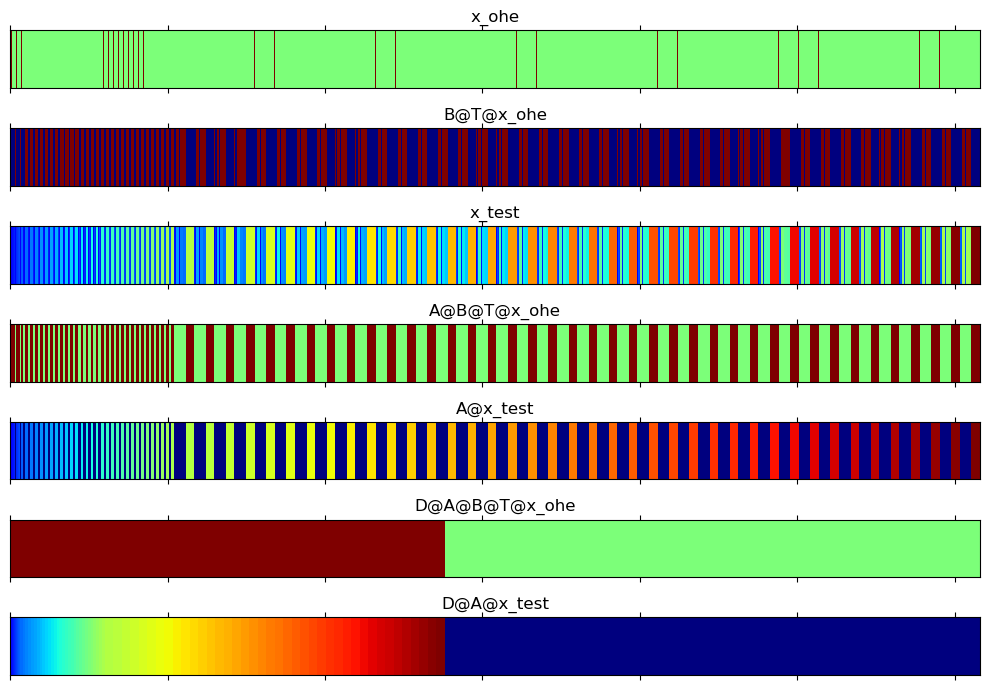

In [4]:
# Specify sequence and ohe_spec_str
alphabet = 'ACGT'
alpha = len(alphabet)
L = 10
seq = L*'T'
n_order = 3
n_adj = 5
L = len(seq)
ohe_spec_str = my.get_ohe_spec_str(L, n_order=n_order, n_adj=n_adj)
print(f'seq: {seq}')
print(f'alphabet: {alphabet}')
print(f'alpha: {alpha}')

# Get one-hot encoding of x
x_ohe = my.seq_to_x_ohe(seq, ohe_spec_str, alphabet=alphabet)
print(f'x_ohe.shape: {x_ohe.shape}')

M = len(x_ohe)
print(f'M: {M}')

# Get transformation matrix
T, T_inv = my.ohe_spec_to_T(ohe_spec_str, alpha=alpha, compute_inv=True)
print(f'T.shape: {T.shape}')

# Get reordering matrix
B, B_inv = my.ohe_spec_to_B(ohe_spec_str, alpha=alpha)
print(f'B.shape: {B.shape}')

# Get sim_spec
sim_spec_str = my.ohe_to_sim_spec(ohe_spec_str)

# Get thinning matrix
A, A_inv = my.get_thinning_matrix(sim_spec_str, alpha=alpha)
print(f'A.shape: {A.shape}')

# Get vector to test thinning matrix
x_test = my.get_x_to_test_thinning_matrix(sim_spec_str, alpha=alpha)
print(f'x_test.shape: {x_test.shape}')

# Get distilling matrix
D, D_inv, gamma = my.get_distilling_matrix(sim_spec_str, alpha=alpha)
print(f'D.shape: {D.shape}')
print(f'gamma: {gamma}')

# Make figure
fig, axs = plt.subplots(7,1,figsize=[10,7])

# Show x_ohe
ax = axs[0]
ax.matshow(np.mat(x_ohe), vmin=-1, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('x_ohe')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

# Show T@x_ohe
ax = axs[1]
ax.matshow(np.mat(B@T@x_ohe), vmin=-1, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('B@T@x_ohe')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

# Show x_test
ax = axs[2]
ax.matshow(np.mat(x_test), vmin=0, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('x_test')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

# Show A@T@x_ohe
ax = axs[3]
ax.matshow(np.abs(np.mat(A@B@T@x_ohe)), vmin=-1, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('A@B@T@x_ohe')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

# Show A@x_test
ax = axs[4]
ax.matshow(np.mat(A@x_test), vmin=0, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('A@x_test')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

# Show D@A@T@x_ohe
ax = axs[5]
ax.matshow(np.abs(np.mat(D@A@B@T@x_ohe)), vmin=-1, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('D@A@B@T@x_ohe')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

# Show A@x_test
ax = axs[6]
ax.matshow(np.mat(D@A@x_test), vmin=0, vmax=1, cmap='jet')
ax.set_yticks([])
ax.set_title('D@A@x_test')
ax.set_aspect('auto')
#ax.set_xticks(range(M))
ax.set_xticklabels([])

plt.tight_layout()
print(sim_spec_str)

# Test A@B@T@x_ohe == x_dist for all possible sequences
all_seqs = my.make_all_seqs(L)
num_matches = 0
for seq in all_seqs:
    x_ohe = my.seq_to_x_ohe(seq, ohe_spec_str, alphabet=alphabet)
    desired_BTx = my.seq_to_desired_BTx(seq, sim_spec_str, alphabet=alphabet)
    match = all(B@T@x_ohe == desired_BTx)
    if match:
        num_matches += 1
    else:
        print(f'mismatch for {seq}')
print(f'B@T@x_ohe == x_dist for {num_matches}/{len(all_seqs)} seqs')

# Test that matrices invert properly
C = A@B@T
C_inv = T_inv@B_inv@A_inv
print('C@C_inv == I:', np.allclose((C@C_inv).todense(), np.eye(M)))

# Check gauge basis
E = D@A@B@T
gauge_basis = E[(M-gamma):,:].T
all_seqs = my.make_all_seqs(L)
x_ohes = np.array([my.seq_to_x_ohe(seq, ohe_spec_str, alphabet=alphabet) for seq in all_seqs]).T
np.allclose((gauge_basis.T)@x_ohes, 0)
print('Unique elements of gauge basis', np.unique(gauge_basis.data))

In [5]:
# Test A@B@T@x_ohe == x_dist for all possible sequences 
seqs = my.make_random_seqs(L, N=100)
num_matches = 0
for seq in seqs:
    x_ohe = my.seq_to_x_ohe(seq, ohe_spec_str)
    desired_BTx = my.seq_to_desired_BTx(seq, sim_spec_str)
    match = all(B@T@x_ohe == desired_BTx)
    if match:
        num_matches += 1
    else:
        print(f'mismatch for {seq}')
print(f'B@T@x_ohe == x_dist for {num_matches}/{len(all_seqs)} seqs')

# Test that matrices invert properly
C = A@B@T
C_inv = T_inv@B_inv@A_inv
print('C@C_inv == I:', np.allclose((C@C_inv).todense(), np.eye(M)))

# Check gauge basis
E = D@A@B@T
gauge_basis = E[-gamma:,:].T
seqs = my.make_random_seqs(L, N=100)
x_ohes = np.array([my.seq_to_x_ohe(seq, ohe_spec_str) for seq in seqs]).T
print(f'All {gamma:,d} gauge vectors are orthogonal to embeddings of all {x_ohes.shape[1]:,d} random seqs:', np.allclose((gauge_basis.T)@x_ohes, 0))
print('Unique elements of gauge basis', np.unique(gauge_basis.data))

B@T@x_ohe == x_dist for 100/1000 seqs
C@C_inv == I: True
All 1,700 gauge vectors are orthogonal to embeddings of all 100 random seqs: True
Unique elements of gauge basis [-1  1]


In [6]:
import scipy.sparse as sp
import numpy as np
import pdb

def ohe_spec_to_B(ohe_spec_str, alpha=4):
    '''
    input: ohe_spec_str
    output: T (s.t. T x = x_factored)
    '''
    # Split ohe_spec_str into parts
    parts = ohe_spec_str.split('+')

    # Get maximum order
    max_order = np.max([len(part.split('x')) for part in parts])

    # Build blocks for order up to maximum order
    I_triv = np.eye(1, dtype=np.int64)
    I_ohe = np.eye(alpha, dtype=np.int64)
    
    order_to_block_dict = {}
    B_part = I_triv
    B_part_inv = I_triv
    for k in range(max_order + 1):
        order_to_block_dict[k] = (B_part.copy(), B_part_inv.copy())

        # Fix up row order 
        m = alpha**k
        B_part = sp.kron(B_part, I_ohe)
        B_part_inv = sp.kron(B_part_inv, I_ohe)
        
        i_vals = list(range(m*alpha))
        j_vals = [alpha*i for i in range(m)] + [i-m+1+(i-m)//(alpha-1) for i in range(m,m*alpha)]
        data = m*alpha*[1]
        new_B = sp.coo_array((data, (i_vals, j_vals)), shape=(alpha*m,alpha*m)).tocsr()
        #pdb.set_trace()
        B_part = new_B@B_part
        B_part_inv = B_part_inv@(new_B.T)

    # Build block matrix
    diag_mats = []
    diag_mats_inv = []
    for part in parts:
        if part == '.':
            order = 0
        else:
            order = len(part.split('x'))
        B_part, B_part_inv = order_to_block_dict[order]
        diag_mats.append(B_part)
        diag_mats_inv.append(B_part_inv)

    B = sp.block_diag(diag_mats, format='csr')
    B_inv = sp.block_diag(diag_mats_inv, format='csr')
    
    return B, B_inv

# Test
B_new, B_inv_new = ohe_spec_to_B(ohe_spec_str=ohe_spec_str, alpha=alpha)
np.all(np.isclose(B_new.todense(), B.todense()))

True